<a href="https://colab.research.google.com/github/kkimyunjoo/24-1-ESAA/blob/main/0503_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 머신러닝 완벽가이드**

pg. 290~319

**CH.5 회귀**

**01. 회귀 소개**
- 회귀: 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 머신 러닝 회귀 예측: 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
- 회귀의 종류
  - 독립변수 개수
    - 1개: 단일 회귀
    - 여러 개: 다중 회귀
  - 회귀 계수의 결합
    - 선형: 선형 회귀
    - 비선형: 비선형 회귀
- 선형 회귀(가장 많이 사용함)
  - 일반 선형 회귀: 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
  - 릿지(Ridge): 선형 회귀에 L2 규제(상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 것)를 추가한 회귀 모델
  - 라쏘(Lasso):선형 회귀에 L1 규제(예측 영향력잉 작은 피처의 회귀 계수를 0으로 만듦)를 적용한 방식
  - 엘라스틱넷(ElasticNet): L1, L2 규제를 함께 결합한 모델, 주로 피처가 많은 데이터 세트에서 적용됨.
  - 로지스틱 회귀(Logistic Regression): 분류에 사용되는 선형 모델

**02. 단순 선형 회귀를 통한 회귀 이해**
- 단순 선형 회귀: 독립 변수 하나, 종속 변수 하나인 선형 회귀
- 잔차: 실제 값과 회귀 모델의 차이에 따른 오류 값

  -> 최적의 회귀 모델: 전체 데이터의 잔차 합이 최소가 되는 모델
  - 전체 데이터의 오류 합의 구하는 방법: RSS 방식(오류 값의 제곱을 구해서 더하는 방식)
  - Error^2=RSS
- RSS의 회귀식: w(회귀계수)가 중심 변수
  - 비용함수 -> 더 이상 감소하지 않는 최소의 오류 값을 구해야 함.

**03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**
- 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- Step 1: w0, w1을 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다.
- Step 2: w0, w1을 (기존값+편미분값) 으로 업데이트 하여 다시 비용함수의 값을 계산한다.
- Step 3: 비용함수 값이 감소했으면, 다시 Step 2를 반복한다. 더 이상 비용 함수의 값이 감소하지 않으면 그때의 w0, w1을 구하고 반복을 중지한다.

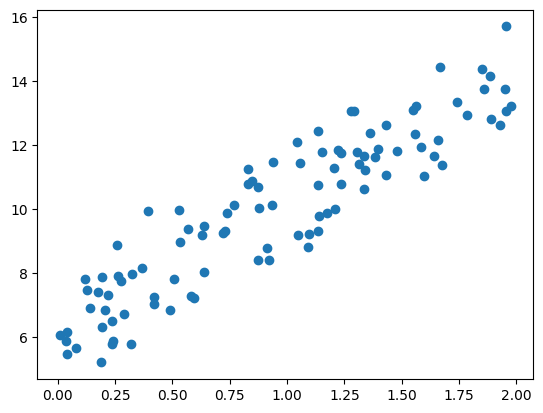

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y = 4X+6을 근사(w1=4,w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6+ 4*X + np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [2]:
#비용함수
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [3]:
#w1과 w0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N = len(y)
  #먼저 w1_update, w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  #에측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  #w0_update을 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  #w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

w1, w0를 업데이트하는 함수인 gradient_descent_step() 함수를 생성

In [4]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X,y,iters=1000):
  #w0와 w1을 모두 0을 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  #인자로 주어진 iters 만큼 반복적으로 get_weight_ updates() 호출해 w1,w0 업데이터 수정
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate = 0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1,w0

In [5]:
def  get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1,w0 = gradient_descent_steps(X,y, iters=1000)
print('w1:{0:.3f}w0:{1:.3f}'. format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022w0:6.162
Gradient Descent Total Cost:0.9935


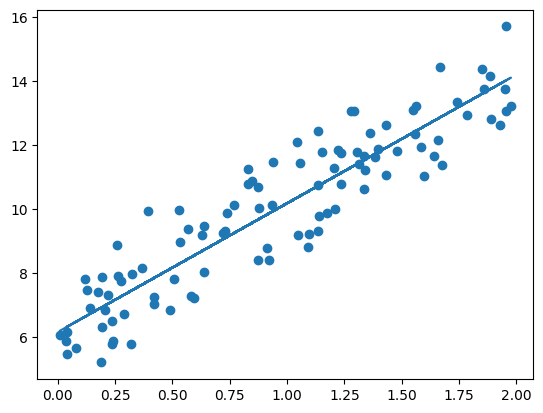

In [6]:
#y_pred에 기반해 회귀선 그리기
plt.scatter(X,y)
plt.plot(X,y_pred)

- stochastic_gradient_descent_steps(): X,y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산함

In [7]:
def stochastic_gradient_descent_steps(X,y,batch_size = 10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1,w0

In [8]:
#w1, w0 및 예측 오류 비용 게산
w1,w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
print('w1:',round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


**04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

class sklearn.linear_model.LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=1)

- 입력 파라미터
  - fit_intercept: 불린 값으로 디폴트는 True. intercept를 계산할지 말지 지정함.
  - normalize: 불린 값으로 디폴트는 False.  fit_intercept가 False인 경우에는 이 파라미터는 무시되며, True이면 회귀 수행 전에 입력 데이터 세트를 정규화한다.
- 속성
  - coef_: fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성
  - intercept_: intercept 값

**[회귀 평가 지표]**
- MAE: 실제 값과 예측 값의 차이를 절댓값으로 변환해 평균한 것
- MSE: 실제 값과 예측값의 차이를 제곱해 평균한 것
- RMSE: MSE에 루트를 씌운 것
- R^2: 분산 기반으로 예측 성능을 평가, 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며 1에 가까울수록 예측 정확도가 높음.

**[LinearRegression을 이용해 보스턴 주택 가격 회귀 구현]**

In [9]:
#LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.
feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' ,'LSTAT', 'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


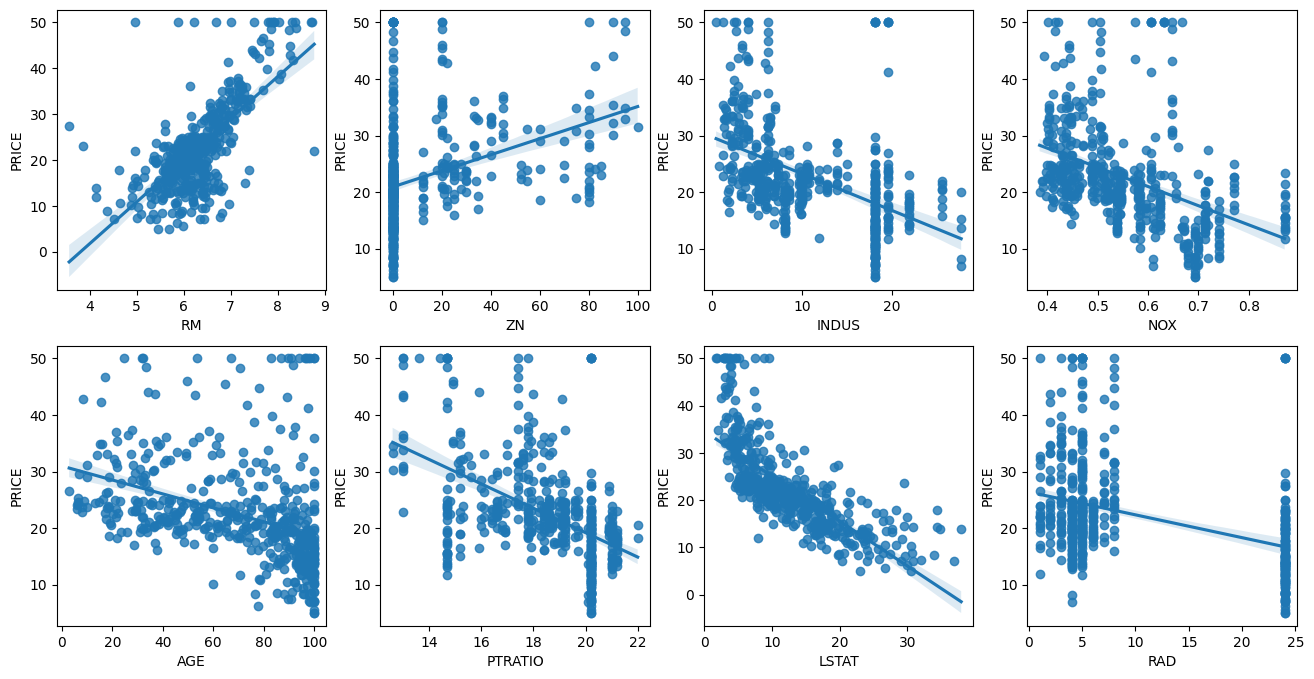

In [10]:
#2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐

fig, axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO','LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x = feature, y='PRICE', data=bostonDF, ax = axs[row][col])

In [11]:
#MSE와 R2 Score 측정
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,random_state=156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [12]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

절편 값: 40.995595172164826
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [13]:
#coef_ 속성은 회귀 계수 값만 가지고 있으므로
#이를 피처별 회귀 계수 값으로 다시 매핑 후, 높은 값 순서로 출력하기

#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [14]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr  = LinearRegression()

#cross_val_score()로 폴드 5개 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함.
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


**05. 다항 회귀와 과(대)적합/과소적합 이해**

**[다항 회귀 이해]**
- 다항 회귀도 선형 회귀의 일종
- 선형/비선형 회귀를 나누는 기준은 회귀 게수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형과는 무관함.
- 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음 -> 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현
  - PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환

In [15]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 개수 피처:\n', X)

#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 개수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [17]:
#3차 다항 회귀 함수 임의로 설정
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [18]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

#LinearRegression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomiaal 회귀 Shape: ', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomiaal 회귀 Shape:  (10,)


In [19]:
#사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1+ 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**[다항 회귀를 이용한 과소적합 및 과적합 이해]**
- 차수가 높아질수록 과적합의 문제가 크게 발생함.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X)+np.random.rand(n_samples)*0.1


Degree 1 회귀 계수는 [-1.52] 입니다.

Degree 1 MSE는 0.38559805246752143입니다,

Degree 4 회귀 계수는 [  1.74 -22.98  31.58 -11.24] 입니다.

Degree 4 MSE는 0.005719308263123808입니다,

Degree 15 회귀 계수는 [ 1.20140000e+02 -3.59870000e+03  5.21443400e+04 -4.14472980e+05
  1.80865858e+06 -3.37977203e+06 -6.02740547e+06  5.58455564e+07
 -1.69830273e+08  3.08634288e+08 -3.68970992e+08  2.93850756e+08
 -1.50697972e+08  4.51481187e+07 -6.01515605e+06] 입니다.

Degree 15 MSE는 42897776.31805821입니다,


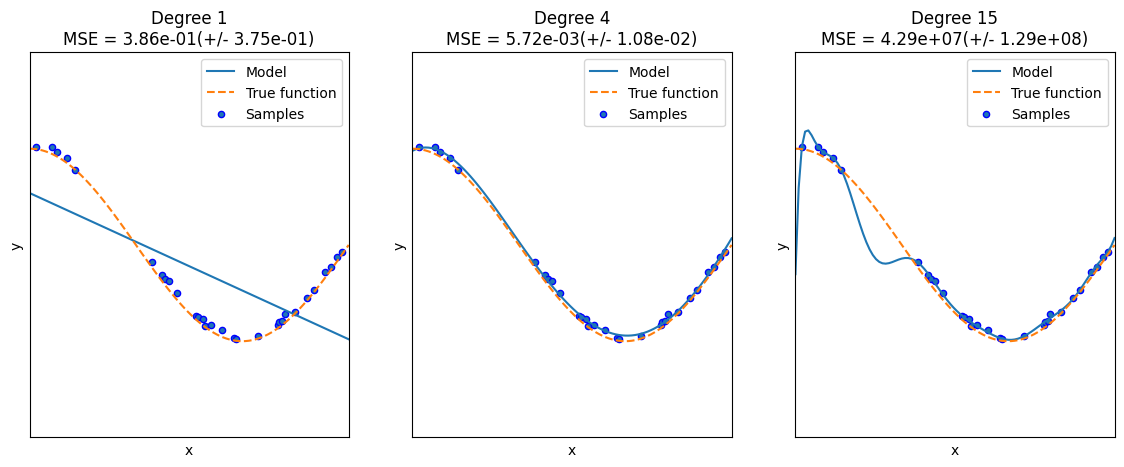

In [21]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

#다항 회귀 차수(degree)를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())

  #개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  #교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error',cv=10)
  #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('\nDegree {0} MSE는 {1}입니다,'.format(degrees[i], -1*np.mean(scores)))

  #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0,1,100)
  #예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
  #실제 값 곡선
  plt.plot(X_test,true_fun(X_test), '--', label='True function')
  plt.scatter(X,y,edgecolor='b', s=20, label='Samples')

  plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2));plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(),scores.std()))

plt.show()

- Degree 1
  - 단순한 직선으로서 단순 선형 회귀와 동일.
  - 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델
- Degree 4
  - 실제 데이터 세트와 유사한 모습
  - 변동하는 잡을까지 예측하지는 못했지만 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 모델
- Degree 15
  - MSE 값이 매우 큼.
  - 데이터 세트의 변동 잡음을 지나치게 반영하여 예측곡선이 학습 데이터 세트만 정확하게 예측하고, 테스트 실제 곡선과는 다른 형태가 생성됨.
  - 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델

**[편향-분 트레이드오프(Bias-Variance Trade off)]**

- Degree 1 모델: 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향 -> 고편향성(High Bias)
- Degree 15 모델: 학습 데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되었고, 지나치게 높은 변동성을 가지게 됨. -> 고분산성(High Variance)
- 편향과 분산은 한 쪽이 높으면 한 쪽은 낮아지는 경향이 있음.
  - 편향이 너무 높으면 전체 오류가 높다.
  - 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아지게 됨.
  - 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스'지점을 통과하면서 분산을 지속적으로 높이면 전체 오류값이 오히려 증가하게 된다.

-> 높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉬움.

*-> 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법*